# MA506 Probability and Statistical Inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Getting the dataset

Here we will be working with a toy dataset to understand the concept in a better way.

In [2]:
x = np.array([3, 6, 9, 12])
y = np.array([3, 6, 5, 8])

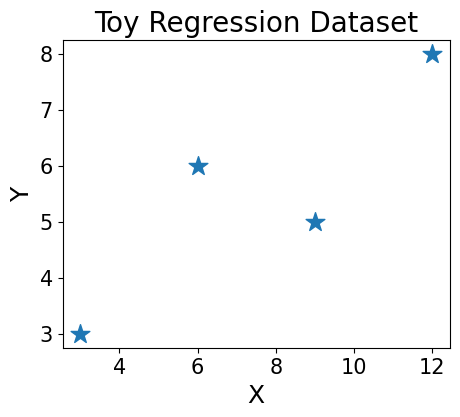

In [4]:
fig = plt.figure(figsize = (5,4))
plt.scatter(x,y,marker = '*',s = 200)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('X',size = 18)
plt.ylabel('Y',size = 18)
plt.title('Toy Regression Dataset',size = 20)
plt.show()

# 2. Linear Regression

## 2.1 For now assuming we want to fit a straight line: $y = \beta_1x + \beta_0$

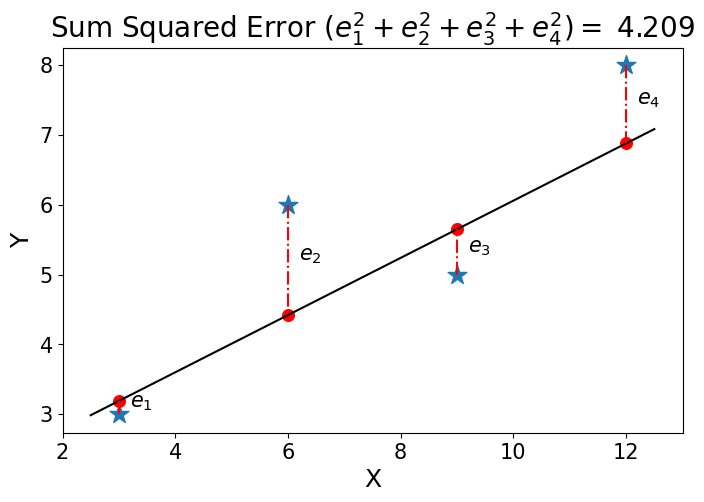

In [5]:
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,marker = '*',s = 200)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('X',size = 18)
plt.ylabel('Y',size = 18)
xx = np.linspace(x.min()-0.5,x.max()+0.5,100)
yy = 0.41*xx + 1.96
plt.plot(xx,yy,color = 'k')

pred_yy = 0.41*x + 1.96
summ = 0
for j in range(len(x)):
    xx = [x[j],x[j]]
    yy = [y[j],pred_yy[j]]
    ax.plot(xx,yy,color = 'r',linestyle = '-.')
    ax.scatter(x[j],pred_yy[j],color = 'r',s = 70)
    s = (y[j]-pred_yy[j])/2
    summ = summ + (s*2)**2
    plt.text(x[j]+0.2,y[j]-s,f'$e_{j+1}$',size = 15)
plt.title(f'Sum Squared Error $(e_1^2+e_2^2+e_3^2+e_4^2) = $ {np.round(summ,3)}',size = 20)
plt.show()

#### Now we analyze the SSE for 6 possible random straight line fits.

Execute the code below to generate 6 possible straight line fits to this data and try guessing which one is the best

In [6]:
def poly(x,y):
    X = np.ones([len(x),2])
    X[:,1] = x.flatten()
    beta0,beta1 = np.linalg.lstsq(X, y, rcond=None)[0]
    pred_x = np.linspace(x.min(),x.max(),100)
    fig = plt.figure(figsize = (20,18))
    for i in range(6):
        ## Getting the line
        beta0_1 = np.random.normal(0,0.05)+beta0
        beta1_1 = np.random.normal(0,0.2)+beta1
        pred_y = beta0_1 + beta1_1*pred_x
        
        ## plotting the line
        ax = fig.add_subplot(3,2,i+1)
        ax.plot(pred_x,pred_y, lw = 2,color = 'k',label = f'y = {np.round(beta1_1,2)}x + {np.round(beta0_1,2)}')
        
        ## scatter plot of data
        plt.scatter(x,y,marker = '*',s = 200, label = 'True Data')
        plt.xticks(size = 15)
        plt.yticks(size = 15)
        plt.xlabel('X',size = 18)
        plt.ylabel('Y',size = 18)
        ax.set_ylim([2.5,10])
        
        ## error in prediction
        pred_yy = beta0_1 + beta1_1*x
        summ = 0
        for j in range(len(x)):
            xx = [x[j],x[j]]
            yy = [y[j],pred_yy[j]]
            ax.plot(xx,yy,color = 'r',linestyle = '-.')
            ax.scatter(x[j],pred_yy[j],color = 'r',s = 70)
            s = (y[j]-pred_yy[j])/2
            summ = summ + (s*2)**2
            plt.text(x[j]+0.2,y[j]-s,f'$e_{j+1}$',size = 15)
    
        ax.scatter(x[j],pred_yy[j],color = 'r',s = 70, label = 'Predictions')
        plt.title(f'SSE $((e_1^2+e_2^2+e_3^2+e_4^2) =$ {np.round(summ,3)}',size = 20)
        plt.legend(loc = 2,prop = {'size':15})
        
    
    plt.subplots_adjust(hspace = 0.4)
    plt.show()

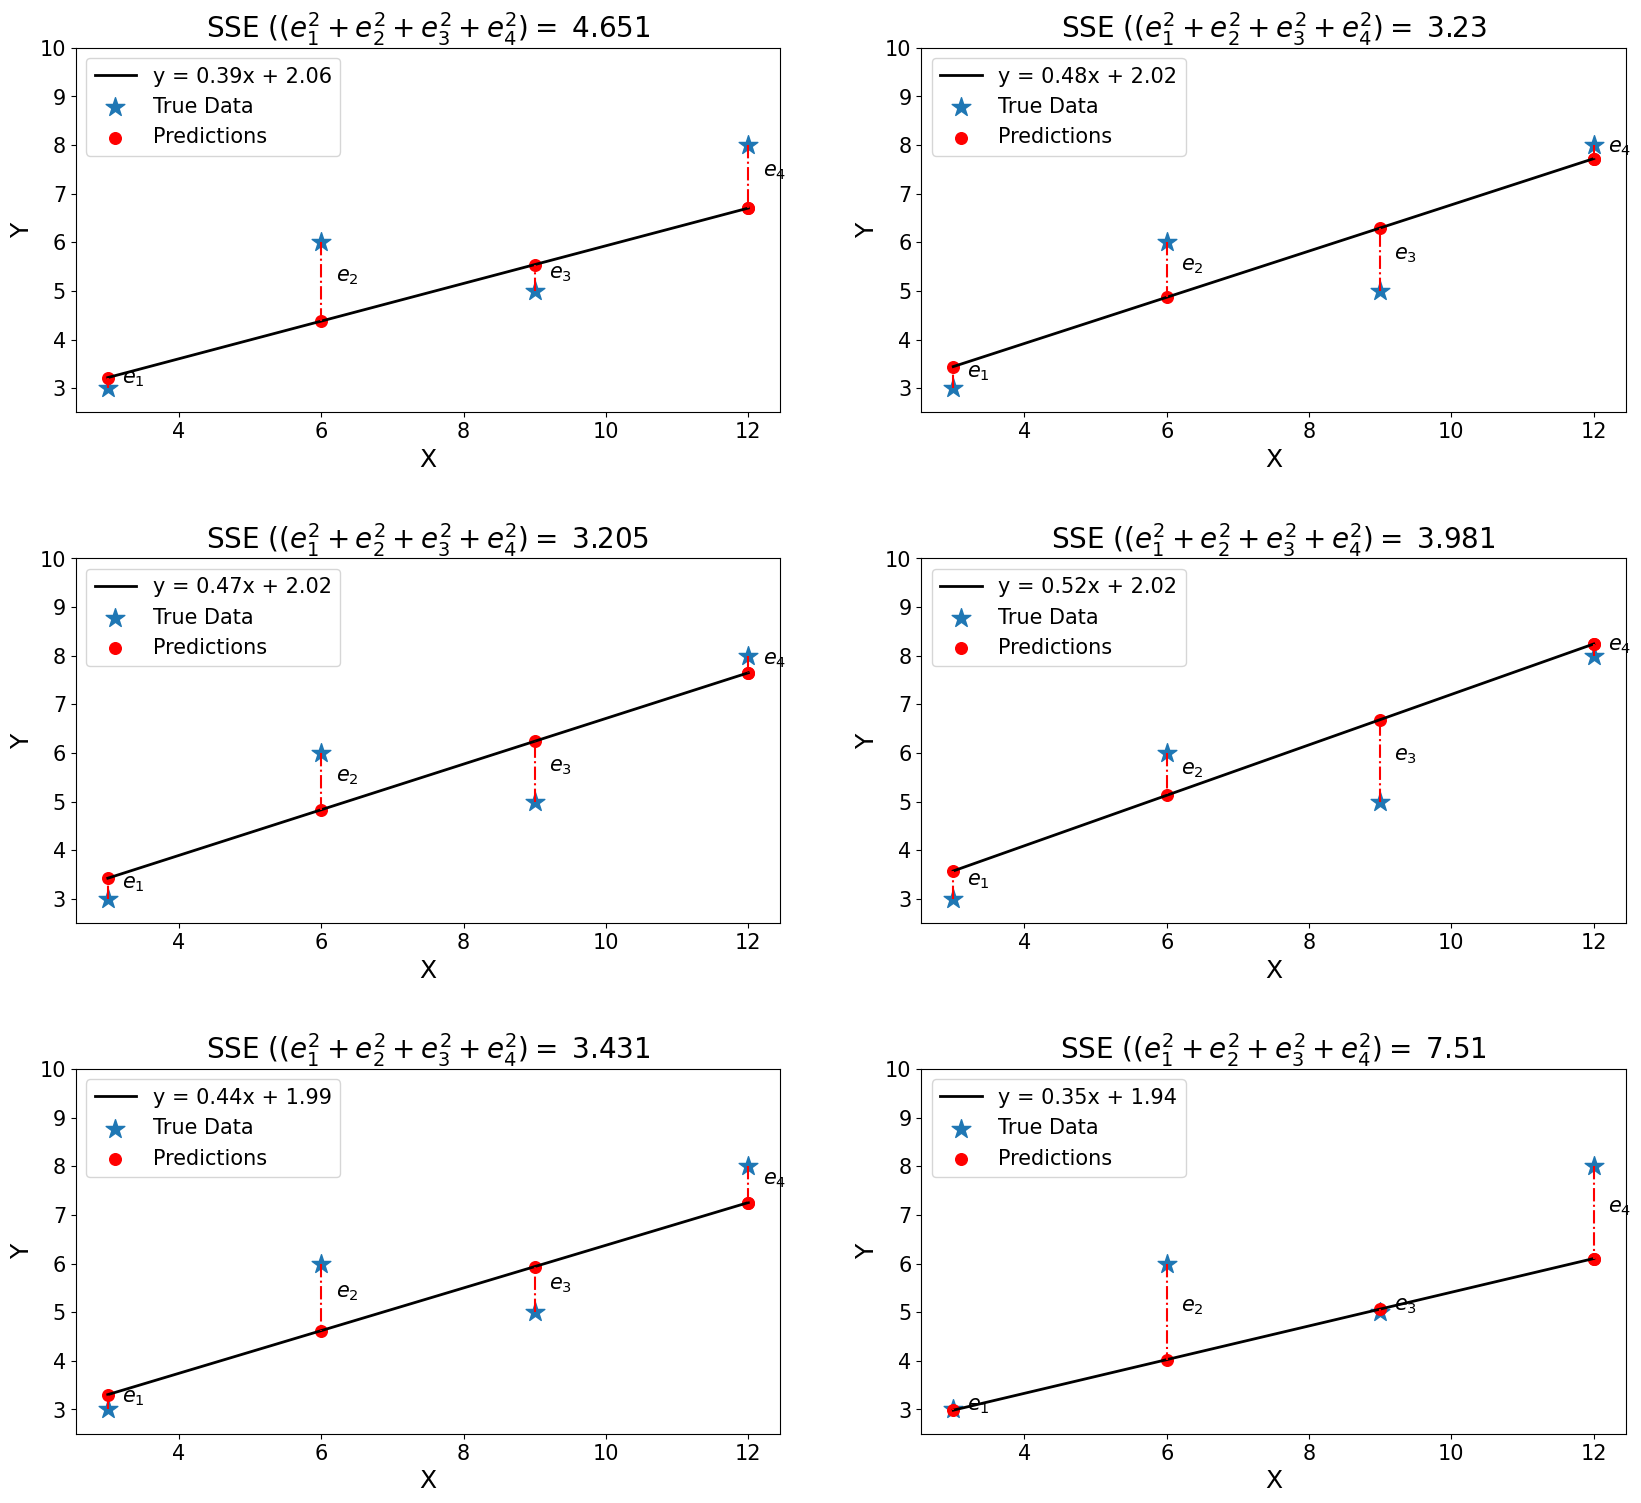

In [7]:
poly(x,y)

However, for analyzing the error per sample, we will use $\textbf{Mean Squared Error (MSE)}$:

$$\frac{1}{n}\sum_{i=1}^n e_i^2$$

where n is the number of samples. For the current case we have:

$$MSE = \frac{1}{4}(e_1^2 + e_2^2 + e_3^2 + e_4^2)$$

Hence we want a line(curve) for which the $\color{red}{\text{MSE is minimum}}$

# 2.2 Linear Regression model: The Ordinary Least Squares (OLS) problem

Starting by fitting a straight line $\hat{y} = \beta_1x + \beta_0$. Here $\hat{y}$ will be the prediction at a given $x$.

Like previous example, suppose we want to fit a line and we have just 4 data points $(x_1, y_1)$, $(x_2, y_2)$, $(x_3, y_3)$, $(x_4, y_4)$. So at these 4 data points, for a given combination of $\beta_1$ and $\beta_0$, the predictions $\hat{y}_1$, $\hat{y}_2$, $\hat{y}_3$ and $\hat{y}_4$ at $x_1$, $x_2$, $x_3$ and $x_4$ respectively are as follows:

\begin{align}
\hat{y}_1 &= \beta_1x_1 + \beta_0\\
\hat{y}_2 &= \beta_1x_2 + \beta_0\\
\hat{y}_3 &= \beta_1x_3 + \beta_0\\
\hat{y}_4 &= \beta_1x_4 + \beta_0
\end{align}

Let the error in prediction of y's (also referred to as residuals) be represented as $e_1$, $e_2$, $e_3$ and $e_4$ at $x_1$, $x_2$, $x_3$ and $x_4$ respectively. Hence: 

$$e_i = y_i - \hat{y}_i, \forall i\ =\ 1\ to\ 4$$

Using the previous equation, for a given $\beta_1$ and $\beta_0$, we can write the MSE of the straight line model as:

$$MSE = \frac{1}{4}\sum_{i=1}^4e_i^2 = \frac{1}{4}\sum_{i=1}^4(y_i - \hat{y}_i)^2 = \frac{1}{4}\sum_{i=1}^4(y_i - (\beta_1x_i + \beta_0))^2$$

Hence to find the best straight line model we need to find $\beta_1$ and $\beta_0$ for which MSE is minimum. Hence we need to solve the following optimization problem

$$
\min_{\beta_1,\beta_0}MSE = \min_{\beta_1,\beta_0} \frac{1}{4} \sum_{i=1}^4 (y_i - (\beta_1x_i + \beta_0)) \tag{1}$$

Taking a little detour, we introduce an alternate matrix vector notation to solve the optimization problem in (1)

Let

$$
Y = \begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4
\end{bmatrix};
\quad
X = \begin{bmatrix}
1 & x_1\\
1 & x_2\\
1 & x_3\\
1 & x_4
\end{bmatrix};
\quad
\beta = \begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix}\tag{2}
$$

Using the 2-norm notation: $||Y||_2^2 = y_1^2 + y_2^2 + y_3^2 + y_4^2$, we have

\begin{align}
\frac{1}{4}||Y - X \beta||_2^2 &= \frac{1}{4} \left\vert\left\vert
\ \begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4
\end{bmatrix} - 
\begin{bmatrix}
1 & x_1\\
1 & x_2\\
1 & x_3\\
1 & x_4
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1
\end{bmatrix}\ 
\right\vert\right\vert_2^2\\
&= \frac{1}{4} \left\vert\left\vert
\ \begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4
\end{bmatrix} - 
\begin{bmatrix}
\beta_0 + \beta_1x_1\\
\beta_0 + \beta_1x_2\\
\beta_0 + \beta_1x_3\\
\beta_0 + \beta_1x_4
\end{bmatrix}\  
\right\vert\right\vert_2^2\\
&= \frac{1}{4} \left\vert\left\vert
\
\begin{bmatrix}
y_1 - (\beta_0 + \beta_1x_1)\\
y_2 - (\beta_0 + \beta_1x_2)\\
y_3 - (\beta_0 + \beta_1x_3)\\
y_4 - (\beta_0 + \beta_1x_4)
\end{bmatrix}\  
\right\vert\right\vert_2^2\\
&= \frac{1}{4} \sum_{i=1}^4 (y_i - (\beta_0 + \beta_1x_i))^2\\
&= MSE
\end{align}

Hence the optimization problem we need to solve has following equivalent forms:

$$
\min_{\beta = [\beta_1,\beta_0]^T}MSE = \min_{\beta_1,\beta_0} \frac{1}{4} \sum_{i=1}^4 (y_i - (\beta_1x_i + \beta_0)) = \min_{\beta} \frac{1}{4}||Y - X\beta||_2^2 \tag{3}
$$

With $X$, $Y$ and $\beta$ as denotd in (2)

$\color{red}{\text{The optimization problems in (3) are referred to as the various forms of Ordinary Least Squares (OLS) problem}}$

# 2.3 Fitting the linear model: Solving OLS problem

In order to find the best fitting line, we need to find values of parameters $\beta_0$, $\beta_1$ that minimizes the $2^{nd}$ form in (3) or equivalently, value of vector $\beta$ that minimizes the $3^{rd}$ form in (3). Choosing the vector notation and representing the optimal $\beta$ as $\hat{\beta}$

\begin{align}
\hat{\beta} &= \arg\min_{\beta} MSE\\  &= \arg\min_{\beta} \frac{1}{4} ||Y-X \beta||_2^2\\
&=\arg\min_{\beta}\frac{1}{4} (Y - X \beta)^T(Y-X \beta)\\
&=\arg\min_{\beta}\frac{1}{4} (Y^T - \beta^TX^T)(Y-X \beta)\\
&=\arg\min_{\beta}\frac{1}{4} (Y^TY - \beta^TX^TY - Y^TX \beta + \beta^TX^TX\beta)\\
&=\arg\min_{\beta}\frac{1}{4} (Y^TY - 2\beta^TX^TY + \beta^TX^TX\beta)
\end{align}

For finding ${\beta}$ that minimizes  MSE (denoted as $\hat{\beta}$), we put $\frac{\partial}{\partial \beta}(MSE) = 0 \implies \frac{\partial}{\partial \beta}\frac{1}{4}(Y^TY - 2\beta^TX^TY + \beta^TX^TX\beta) = 0$

This gives us the normal equation

$$X^TX \hat{\beta} = X^TY$$

Now, if X is full column rank and hence $X^TX$ is invertible, then we have an estimate of optimal $\beta$ denoted as $\hat{\beta}$


\begin{align}
\boxed{
\hat{\beta} = (X^TX)^{-1}X^TY} \tag{4}
\end{align}


# 2.4 Predicting at new x locations

1. Create $X$ matrix for prediction ($X_{pred}$) in the same way as the previous $X$ matrix. Hence, if we want to predict at new x locations: $x_1^{'}$, $x_2^{'}$ and $x_3^{'}$:
$$
X_{pred} = \begin{bmatrix}
1 & x_1^{'}\\
1 & x_2^{'}\\
1 & x_3^{'}
\end{bmatrix}
$$
2. Compute the predictions as
$$
y_{pred} = X_{pred}\hat{\beta}
$$


### <mark style="background-color: #FFFF00">Exercise</mark> 

1. Generate data from $f(x) = Sin(x)+log(x)$ for $x \in [0,10]$
2. Find the weights $\hat{\beta}$ for fitting a straight line to this data
3. Predict f(x) for x = 5.7, using the learnt weights $\hat{\beta}$